# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [12]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [14]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
html_content=browser.html
# Create a Beautiful Soup Object
soup = BeautifulSoup(html_content, 'html.parser')

In [16]:
# Find the table containing the data
table = soup.find('table')

# Extract data from the table
data = []
if table:
    rows = table.find_all('tr')
    for row in rows:
        # Extract the data from each cell in the row
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
        data.append(row_data)

# Display the extracted data
for row in data:
    print(row)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
def scrape_table_rows(url):

 if table:
        rows = table.find_all('tr')
        for row in rows:
            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
            data.append(row_data)

        return data

scraped_rows = scrape_table_rows(url)

# Convert the list of rows into a DataFrame
df = pd.DataFrame(scraped_rows[1:], columns=scraped_rows[0])  

# Display the DataFrame
print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
3730  1889       2018-02-23  1973  133     5    -78.0    730.0
3731  1892       2018-02-24  1974  134     5    -77.0    729.0
3732  1894       2018-02-25  1975  134     5    -76.0    729.0
3733  1893       2018-02-26  1976  135     5    -77.0    728.0
3734  1895       2018-02-27  1977  135     5    -77.0    727.0

[3735 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [49]:
# Replace NaN values in 'sol', 'ls', and 'month' columns with 0
cols_to_int64 = ['sol', 'ls', 'month']
df[cols_to_int64] = df[cols_to_int64].fillna(0).astype('int64')

# Convert 'min_temp' and 'pressure' columns to float64
cols_to_float64 = ['min_temp', 'pressure']
df[cols_to_float64] = df[cols_to_float64].astype('float64')

# Display the updated data types
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [62]:
# Get the count of occurrences for each unique month
month_counts = df['month'].value_counts().sort_index()

# Remove the first row from month_counts
month_counts_filtered = month_counts.iloc[1:]

# Display the counts for each month in ascending order without the first row
print(month_counts_filtered)

month
1     348
2     356
3     384
4     388
5     298
6     294
7     284
8     282
9     268
10    224
11    276
12    332
Name: count, dtype: int64


In [60]:
# Calculate the number of Martian days' worth of data excluding the first row
unique_sols_count = df.iloc[1:, :]['sol'].nunique()
print("Number of Martian days' worth of data:", unique_sols_count)


Number of Martian days' worth of data: 1868


In [64]:
# 3. What is the average low temperature by month?
min_temp_by_month = df.groupby('month')['min_temp'].mean().sort_index().reset_index()

# Remove the first row
min_temp_by_month = min_temp_by_month.iloc[1:]

# Display the average low temperature by month (in numeric order)
print("Average low temperature by month (in numeric order):")
print(min_temp_by_month)


Average low temperature by month (in numeric order):
    month   min_temp
1       1 -77.160920
2       2 -79.932584
3       3 -83.307292
4       4 -82.747423
5       5 -79.308725
6       6 -75.299320
7       7 -72.281690
8       8 -68.382979
9       9 -69.171642
10     10 -71.982143
11     11 -71.985507
12     12 -74.451807


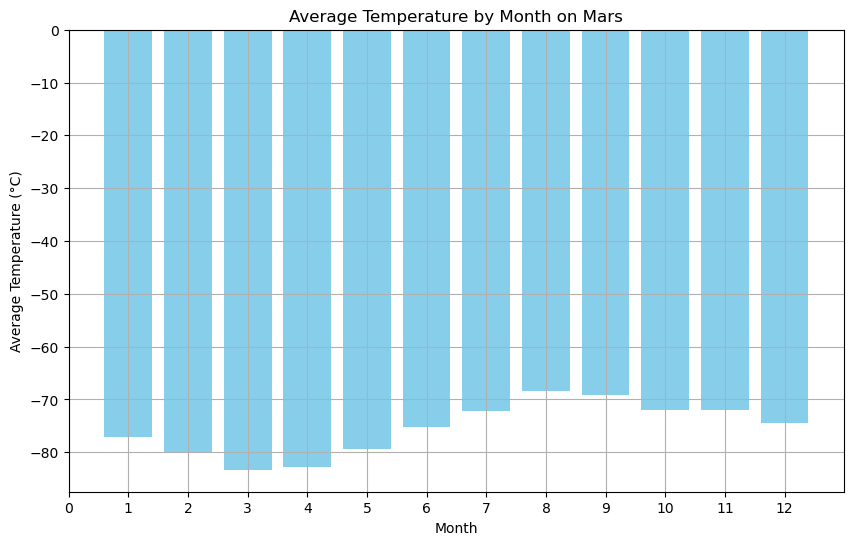

In [67]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(avg_temp_by_month['month'], avg_temp_by_month['min_temp'], color='skyblue')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Month on Mars')

# Set x-axis ticks as month numbers
plt.xticks(avg_temp_by_month['month'])

# Show grid and display the plot
plt.grid(True)
plt.show()


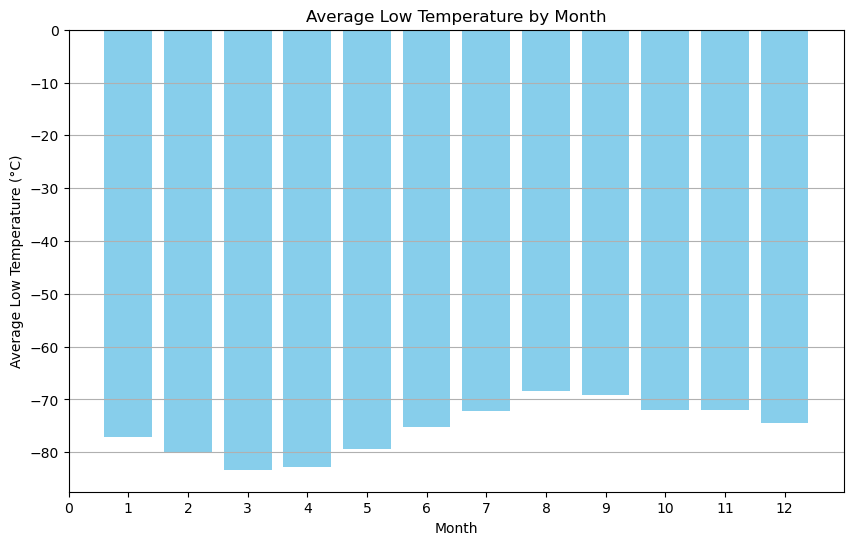

In [68]:

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_temp_by_month['month'], avg_temp_by_month['min_temp'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.title('Average Low Temperature by Month')
plt.xticks(avg_temp_by_month['month'])
plt.grid(axis='y')

plt.show()


In [71]:
# Calculate average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()

# Remove the first row
avg_pressure_by_month = avg_pressure_by_month.iloc[1:]

# Display the updated average pressure by month
print("Average pressure by Martian month:")
print(avg_pressure_by_month)


Average pressure by Martian month:
    month    pressure
1       1  862.488506
2       2  889.455056
3       3  877.322917
4       4  806.329897
5       5  748.557047
6       6  745.054422
7       7  795.105634
8       8  873.829787
9       9  913.305970
10     10  887.312500
11     11  857.014493
12     12  842.156627


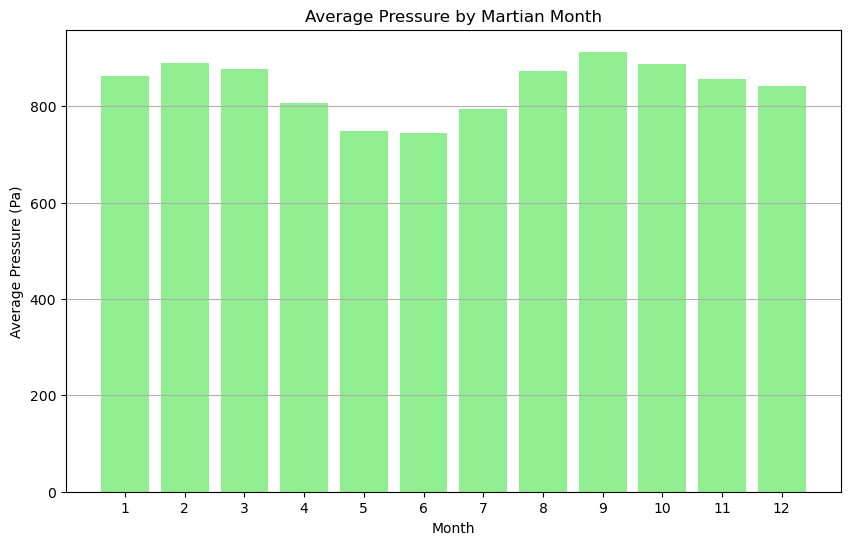

In [72]:
# Plotting the bar graph for average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month['month'], avg_pressure_by_month['pressure'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Martian Month')
plt.xticks(avg_pressure_by_month['month'])
plt.grid(axis='y')

plt.show()


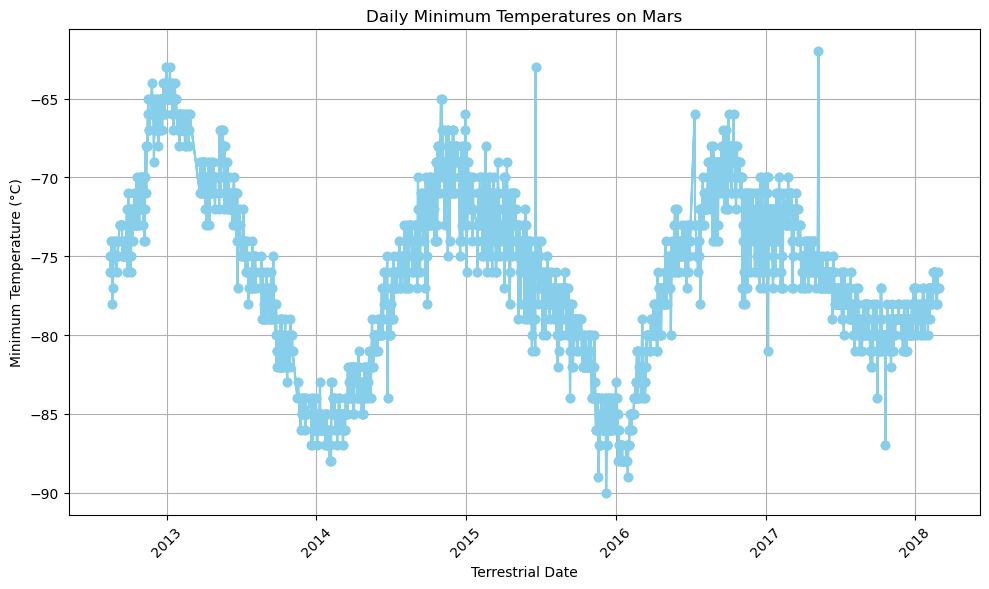

In [76]:
# Plotting daily minimum temperatures against terrestrial date
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperatures on Mars')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [77]:
# Write the data to a CSV
# Export DataFrame 'df' to a CSV file named 'mars_data.csv'
df.to_csv('mars_data.csv', index=False)  

In [21]:
browser.quit()